<a href="https://colab.research.google.com/github/Domtai-cmd/GOTAR-XMD/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


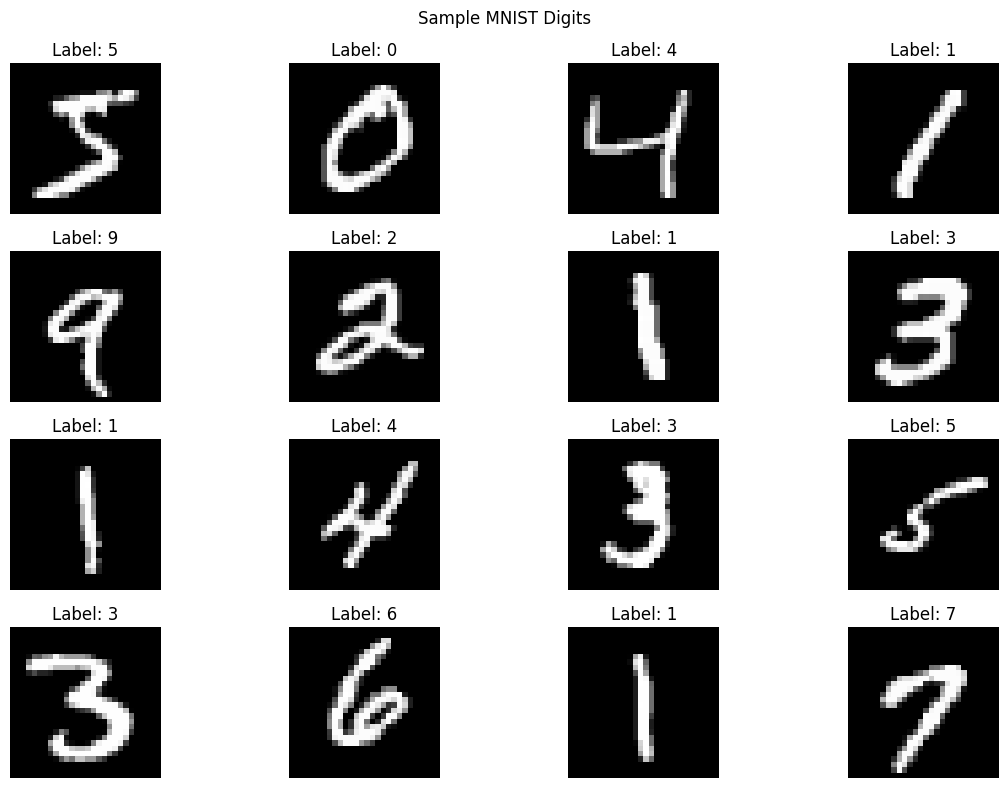

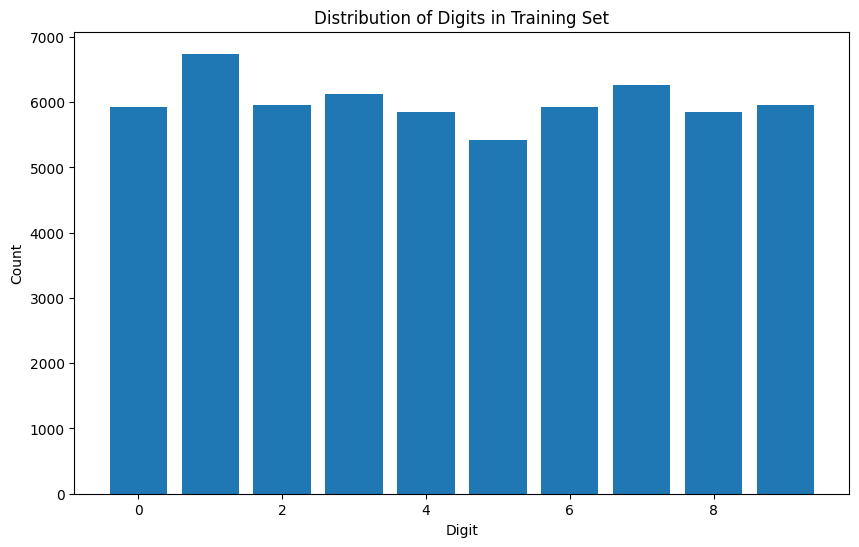

Class distribution:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [2]:
# Visualize sample digits
plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Digits')
plt.tight_layout()
plt.show()

# Check data distribution
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

print("Class distribution:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")

In [4]:
# Normalize pixel values to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Flatten images for classical ML algorithms
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

# One-hot encode labels for deep learning
y_train_onehot = keras.utils.to_categorical(y_train, 10)
y_test_onehot = keras.utils.to_categorical(y_test, 10)

print(f"Flattened training data shape: {x_train_flat.shape}")
print(f"One-hot encoded labels shape: {y_train_onehot.shape}")

Flattened training data shape: (60000, 784)
One-hot encoded labels shape: (60000, 10)


In [5]:
# 1. Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train_flat, y_train)
lr_pred = lr_model.predict(x_test_flat)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# 2. Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(x_train_flat, y_train)
rf_pred = rf_model.predict(x_test_flat)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# 3. Support Vector Machine (on subset due to computational cost)
print("\nTraining SVM on subset...")
subset_size = 10000
indices = np.random.choice(x_train_flat.shape[0], subset_size, replace=False)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(x_train_flat[indices], y_train[indices])
svm_pred = svm_model.predict(x_test_flat[:1000])  # Test on subset
svm_accuracy = accuracy_score(y_test[:1000], svm_pred)
print(f"SVM Accuracy (on subset): {svm_accuracy:.4f}")

Training Logistic Regression...
Logistic Regression Accuracy: 0.9264

Training Random Forest...
Random Forest Accuracy: 0.9704

Training SVM on subset...
SVM Accuracy (on subset): 0.9530


In [ ]:
# Simple Neural Network
def create_simple_nn():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Convolutional Neural Network
def create_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Prepare data for CNN (add channel dimension)
x_train_cnn = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_normalized.reshape(-1, 28, 28, 1)

# Train Simple Neural Network
print("Training Simple Neural Network...")
nn_model = create_simple_nn()
nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

nn_history = nn_model.fit(x_train_normalized, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_split=0.1,
                         verbose=1)

nn_test_loss, nn_accuracy = nn_model.evaluate(x_test_normalized, y_test, verbose=0)
print(f"Simple NN Test Accuracy: {nn_accuracy:.4f}")

# Train CNN
print("\nTraining Convolutional Neural Network...")
cnn_model = create_cnn()
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train_cnn, y_train,
                           batch_size=128,
                           epochs=10,
                           validation_split=0.1,
                           verbose=1)

cnn_test_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")

Training Simple Neural Network...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7445 - loss: 0.8227 - val_accuracy: 0.9590 - val_loss: 0.1417
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9349 - loss: 0.2237 - val_accuracy: 0.9710 - val_loss: 0.1045
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9533 - loss: 0.1581 - val_accuracy: 0.9748 - val_loss: 0.0866
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9610 - loss: 0.1287 - val_accuracy: 0.9770 - val_loss: 0.0762
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9650 - loss: 0.1124 - val_accuracy: 0.9767 - val_loss: 0.0778
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9711 - loss: 0.0965 - val_accuracy: 0.9783 - val_loss: 0.0738
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9720 - loss: 0.0892 - val_accuracy: 0.9797 - val_loss: 0.0716
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.97

In [ ]:
# Plot training history for deep learning models
def plot_training_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title(f'{title} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title(f'{title} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(nn_history, "Simple Neural Network")
plot_training_history(cnn_history, "Convolutional Neural Network")

# Compare all models
models_comparison = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM (subset)', 'Simple NN', 'CNN'],
    'Accuracy': [lr_accuracy, rf_accuracy, svm_accuracy, nn_accuracy, cnn_accuracy]
}

comparison_df = pd.DataFrame(models_comparison)
print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)

# Add accuracy values on bars
for bar, acc in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Analyze the best performing model (likely CNN)
best_model = cnn_model
best_predictions = best_model.predict(x_test_cnn)
best_pred_classes = np.argmax(best_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, best_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report for CNN:")
print(classification_report(y_test, best_pred_classes))

# Visualize some misclassified examples
misclassified_indices = np.where(y_test != best_pred_classes)[0]
plt.figure(figsize=(15, 10))
for i in range(min(20, len(misclassified_indices))):
    idx = misclassified_indices[i]
    plt.subplot(4, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'True: {y_test[idx]}, Pred: {best_pred_classes[idx]}')
    plt.axis('off')
plt.suptitle('Misclassified Examples')
plt.tight_layout()
plt.show()

In [ ]:
# For Random Forest - Feature Importance
feature_importance = rf_model.feature_importances_.reshape(28, 28)
plt.figure(figsize=(8, 6))
plt.imshow(feature_importance, cmap='hot', interpolation='nearest')
plt.title('Random Forest - Pixel Importance')
plt.colorbar()
plt.show()

# CNN Filter Visualization
def visualize_conv_filters(model, layer_idx=0, num_filters=8):
    filters = model.layers[layer_idx].get_weights()[0]
    fig, axes = plt.subplots(1, num_filters, figsize=(15, 3))
    for i in range(num_filters):
        axes[i].imshow(filters[:, :, 0, i], cmap='gray')
        axes[i].set_title(f'Filter {i+1}')
        axes[i].axis('off')
    plt.suptitle('CNN First Layer Filters')
    plt.tight_layout()
    plt.show()

visualize_conv_filters(cnn_model)

In [ ]:
# Save the best model
best_model.save('mnist_cnn_model.h5')
print("Model saved as 'mnist_cnn_model.h5'")

# Load and test the saved model
loaded_model = keras.models.load_model('mnist_cnn_model.h5')
loaded_predictions = loaded_model.predict(x_test_cnn[:10])
loaded_pred_classes = np.argmax(loaded_predictions, axis=1)

print("Predictions from loaded model:", loaded_pred_classes)
print("Actual labels:", y_test[:10])

In [ ]:
def predict_digit(model, image_index):
    """Predict and visualize a single digit"""
    image = x_test_cnn[image_index]
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    plt.figure(figsize=(8, 4))

    # Show image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[image_index], cmap='gray')
    plt.title(f'Test Image\nTrue Label: {y_test[image_index]}')
    plt.axis('off')

    # Show prediction probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(10), prediction[0])
    plt.title(f'Predicted: {predicted_class}\nConfidence: {confidence:.3f}')
    plt.xlabel('Digit')
    plt.ylabel('Probability')
    plt.xticks(range(10))

    plt.tight_layout()
    plt.show()

    return predicted_class, confidence

# Test with a few examples
for i in [0, 100, 500, 1000]:
    predict_digit(cnn_model, i)